<a href="https://colab.research.google.com/github/1900690/Water-meter-reading/blob/main/%E5%8B%95%E7%94%BB%E5%88%87%E3%82%8A%E5%8F%96%E3%82%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found existing installation: opencv-contrib-python 4.13.0.90
Uninstalling opencv-contrib-python-4.13.0.90:
  Successfully uninstalled opencv-contrib-python-4.13.0.90
  Using cached opencv_contrib_python-4.13.0.90-cp37-abi3-manylinux_2_28_x86_64.whl.metadata (19 kB)
Using cached opencv_contrib_python-4.13.0.90-cp37-abi3-manylinux_2_28_x86_64.whl (79.2 MB)
OpenCV Version: 4.13.0
🎬 動画ファイルをアップロードしてください（1回だけでOKです）


Saving PXL_20260123_025224014.mp4 to PXL_20260123_025224014.mp4
✅ 'PXL_20260123_025224014.mp4' のアップロードが完了しました。


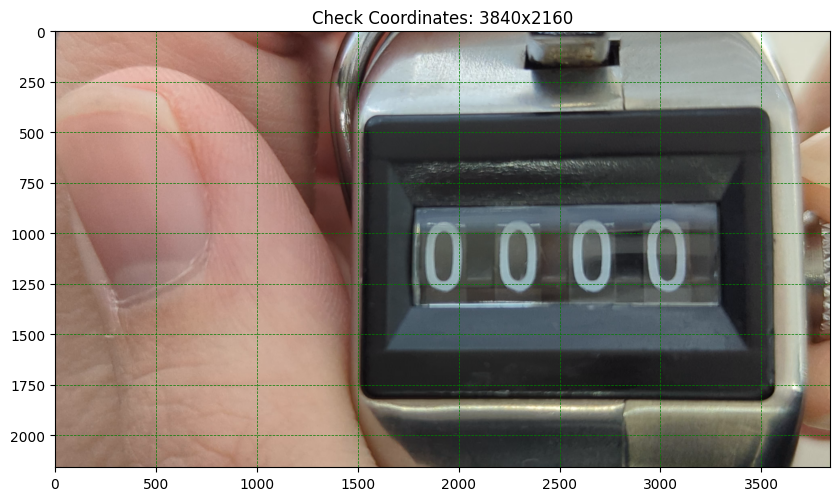

上記画像を参考に、下のセルの右側にあるフォームに数値を入力してください。


In [1]:
# --- 1. ライブラリの準備と動画アップロード ---
# バージョン競合を避けるため、一度アンインストールしてから最新版を入れます
!pip uninstall -y opencv-python opencv-contrib-python
!pip install opencv-contrib-python

import cv2
import os
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

print(f"OpenCV Version: {cv2.__version__}")

# 動画アップロード
print("🎬 動画ファイルをアップロードしてください（1回だけでOKです）")
uploaded = files.upload()
if uploaded:
    video_file = list(uploaded.keys())[0]
    print(f"✅ '{video_file}' のアップロードが完了しました。")

    # 座標確認用に最初のフレームを表示
    cap = cv2.VideoCapture(video_file)
    ret, first_frame = cap.read()
    cap.release()
    if ret:
        h_orig, w_orig, _ = first_frame.shape
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
        plt.grid(True, color='green', linestyle='--', linewidth=0.5)
        plt.title(f"Check Coordinates: {w_orig}x{h_orig}")
        plt.show()
        print(f"上記画像を参考に、下のセルの右側にあるフォームに数値を入力してください。")

In [4]:


#@title 🛠 切り取り設定と実行
#@markdown 右側のフォームに数値を入力してください。

X座標 = 1700 #@param {type:"integer"}
Y座標 = 900 #@param {type:"integer"}
幅 = 500 #@param {type:"integer"}
高さ = 800 #@param {type:"integer"}

def process_generic_tracking(input_path, output_path, roi):
    print(f"🚀 処理開始: {output_path}")

    # 【修正箇所】最新のOpenCVの記述形式に変更
    tracker = cv2.TrackerKCF.create()

    cap = cv2.VideoCapture(input_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    w_out, h_out = roi[2], roi[3]
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (w_out, h_out))

    ret, frame = cap.read()
    if not ret: return

    # 座標は (x, y, w, h) のタプルで渡します
    tracker.init(frame, roi)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret: break

        success, box = tracker.update(frame)

        if success:
            (x, y, w, h) = [int(v) for v in box]
            cx, cy = x + w//2, y + h//2
            x_s = max(0, cx - w_out//2)
            y_s = max(0, cy - h_out//2)

            cropped = frame[y_s:y_s+h_out, x_s:x_s+w_out]

            if cropped.shape[0] != h_out or cropped.shape[1] != w_out:
                cropped = cv2.resize(cropped, (w_out, h_out))
        else:
            # 追跡失敗時は中心を固定
            cropped = cv2.resize(frame[0:h_out, 0:w_out], (w_out, h_out))

        out.write(cropped)
        frame_count += 1
        if frame_count % 300 == 0:
            print(f"進捗: {frame_count}/{total_frames} フレーム完了")

    cap.release()
    out.release()
    print(f"✅ 保存完了")

# 実行
if 'video_file' in locals():
    roi = (X座標, Y座標, 幅, 高さ)
    output_name = f"tracked_{X座標}_{Y座標}.mp4"
    process_generic_tracking(video_file, output_name, roi)

    print("📥 ダウンロードを開始します...")
    files.download(output_name)
else:
    print("❌ 動画がアップロードされていません。セル1を先に実行してください。")

🚀 処理開始: tracked_1700_900.mp4
進捗: 300/2010 フレーム完了
進捗: 600/2010 フレーム完了
進捗: 900/2010 フレーム完了
進捗: 1200/2010 フレーム完了
進捗: 1500/2010 フレーム完了
進捗: 1800/2010 フレーム完了
✅ 保存完了
📥 ダウンロードを開始します...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>